<a href="https://colab.research.google.com/github/hasindu-ramanayake/pytorch/blob/main/PyTorch_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
weight = 0.7
bias = 0.5

start = 0
end = 3
step = 0.03

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight*X + bias
X, Y

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700],
         [0.3000],
         [0.3300],
         [0.3600],
         [0.3900],
         [0.4200],
         [0.4500],
         [0.4800],
         [0.5100],
         [0.5400],
         [0.5700],
         [0.6000],
         [0.6300],
         [0.6600],
         [0.6900],
         [0.7200],
         [0.7500],
         [0.7800],
         [0.8100],
         [0.8400],
         [0.8700],
         [0.9000],
         [0.9300],
         [0.9600],
         [0.9900],
         [1.0200],
         [1.0500],
         [1.0800],
         [1.1100],
         [1.1400],
         [1.1700],
         [1.2000],
         [1.2300],
         [1.2600],
         [1.2900],
         [1.3200],
         [1.3500],
         [1.3800],
         [1.4100],
         [1.4400],
         [1.4700],
         [1.5000],
         [1.5300],
         [1.

In [3]:
train_x_size = int (len(X)*0.8)
train_y_size = int (len(Y)*0.8)
train_x_size, train_y_size


(80, 80)

In [4]:
X_train = X[:train_x_size]
Y_train = Y[:train_y_size]
X_test = X[train_x_size:]
Y_test = Y[train_y_size:]
len(X_train), len(Y_train), len(X_test), len(Y_test)


(80, 80, 20, 20)

In [5]:
# plot the data we have
def plot_predictions( train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=None ):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={ "size": 14})

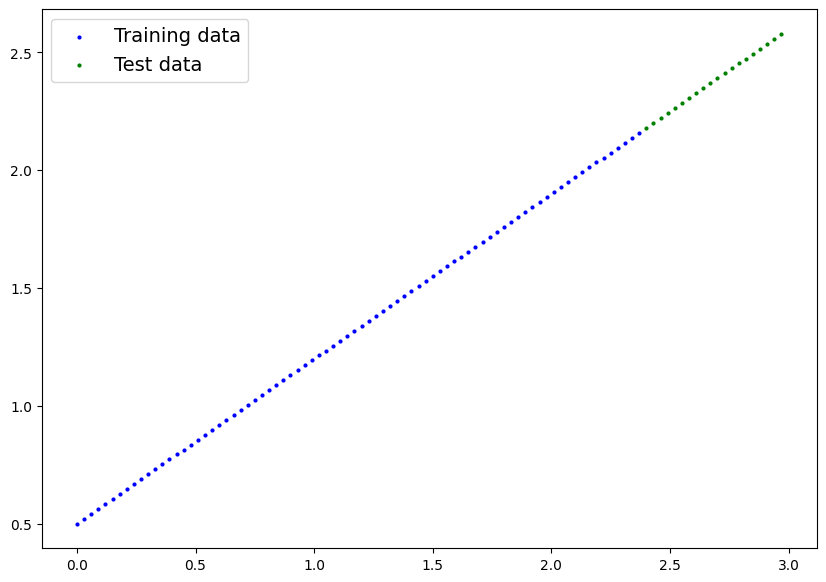

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weight = nn.Parameter( torch.randn(1,requires_grad=True, dtype=torch.float ))
    self.bias = nn.Parameter( torch.randn(1,requires_grad=True, dtype=torch.float ))

  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.weight*x + self.bias


In [8]:
torch.manual_seed(31)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3519])), ('bias', tensor([-0.5683]))])

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD( params=model_0.parameters(), lr=0.02 )


In [10]:
torch.manual_seed(31)
epochs =100
epoch_count = []
loss_value = []
test_loss_value= []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0( X_train )
  loss = loss_fn(y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #### Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, Y_test)
    if epoch %10 == 0:
      epoch_count.append(epoch)
      loss_value.append(loss)
      test_loss_value.append(test_loss)
      print(model_0.state_dict())


OrderedDict([('weight', tensor([0.3756])), ('bias', tensor([-0.5483]))])
OrderedDict([('weight', tensor([0.6126])), ('bias', tensor([-0.3483]))])
OrderedDict([('weight', tensor([0.8496])), ('bias', tensor([-0.1483]))])
OrderedDict([('weight', tensor([0.9924])), ('bias', tensor([0.0072]))])
OrderedDict([('weight', tensor([0.9710])), ('bias', tensor([0.0777]))])
OrderedDict([('weight', tensor([0.9329])), ('bias', tensor([0.1377]))])
OrderedDict([('weight', tensor([0.8948])), ('bias', tensor([0.1977]))])
OrderedDict([('weight', tensor([0.8567])), ('bias', tensor([0.2577]))])
OrderedDict([('weight', tensor([0.8186])), ('bias', tensor([0.3177]))])
OrderedDict([('weight', tensor([0.7798])), ('bias', tensor([0.3772]))])


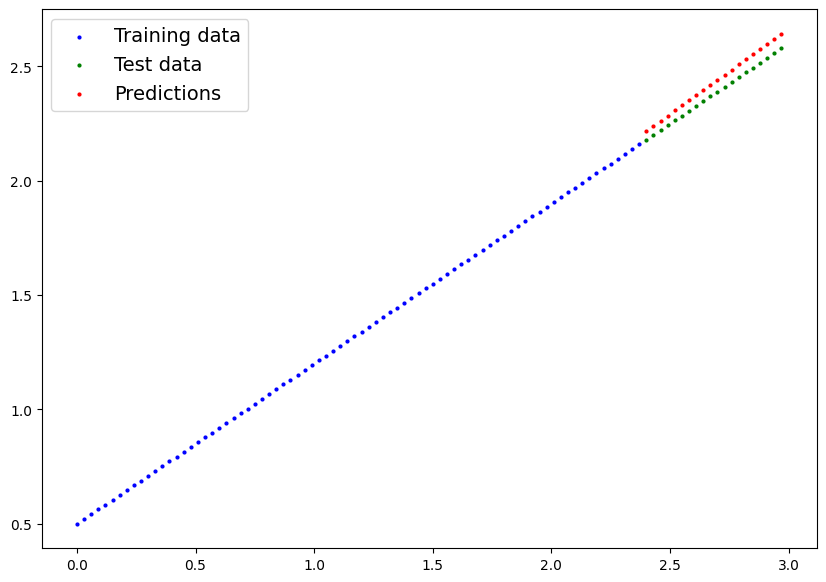

In [11]:
len(y_pred), len(X_train)
plot_predictions(predictions=test_pred.detach().numpy())